# Statistical Analysis

## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2. Read dataset

In [2]:
data = pd.read_csv('../raw_data/data.csv')
data.drop('RowNumber',axis=1,inplace=True)
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
## missing values
data.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


## 3. Feature Engineering

### Exloratory Data Anlaysis

#### Univariate Analysis

In [5]:
df = data.copy()
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
## statistical analysis
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


##### Distribution of gender and country

In [17]:
country_value_counts = df['Geography'].value_counts(normalize=True)
country_value_counts

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64

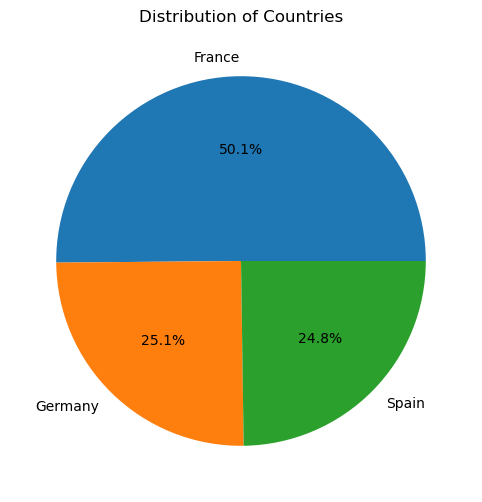

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(country_value_counts.values, labels=country_value_counts.index, autopct='%1.1f%%')
ax.set_title('Distribution of Countries')
plt.show();

#### Distribution of Gender

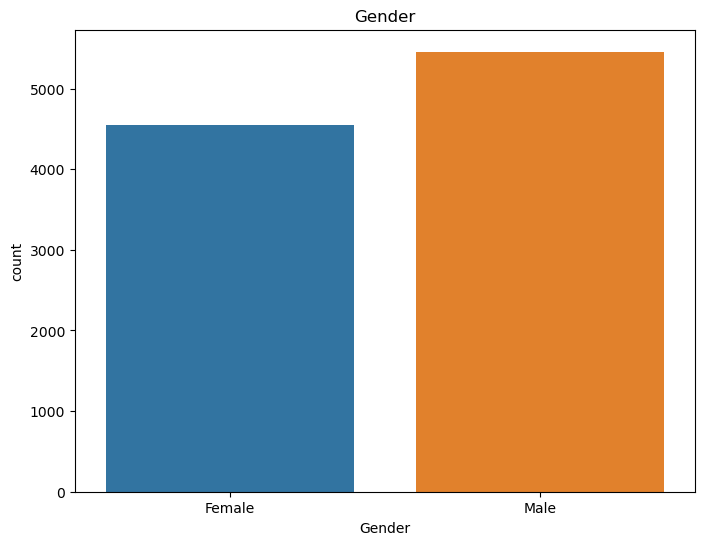

In [19]:
df['Gender'].value_counts()
print()
plt.figure(figsize=(8,6))
sns.countplot(x='Gender',data=df)
plt.title('Gender')
plt.show();

#### Distribution of Age

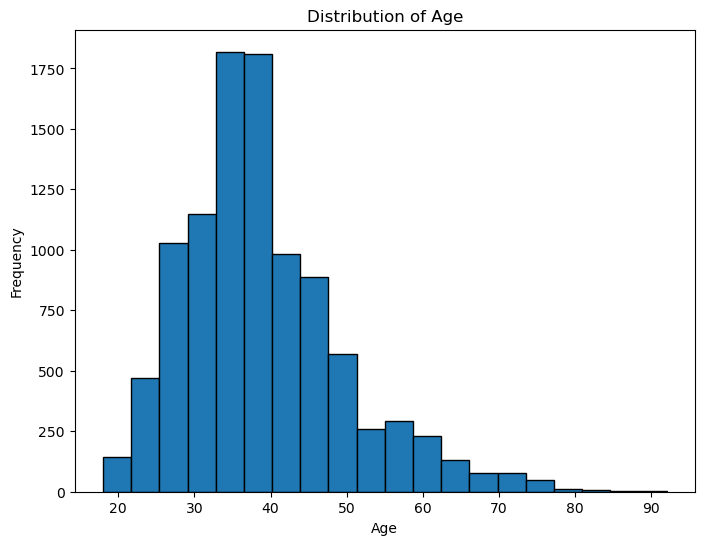

In [13]:
plt.figure(figsize=(8,6))
age = df['Age']

plt.hist(age,bins=20,edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

plt.show();

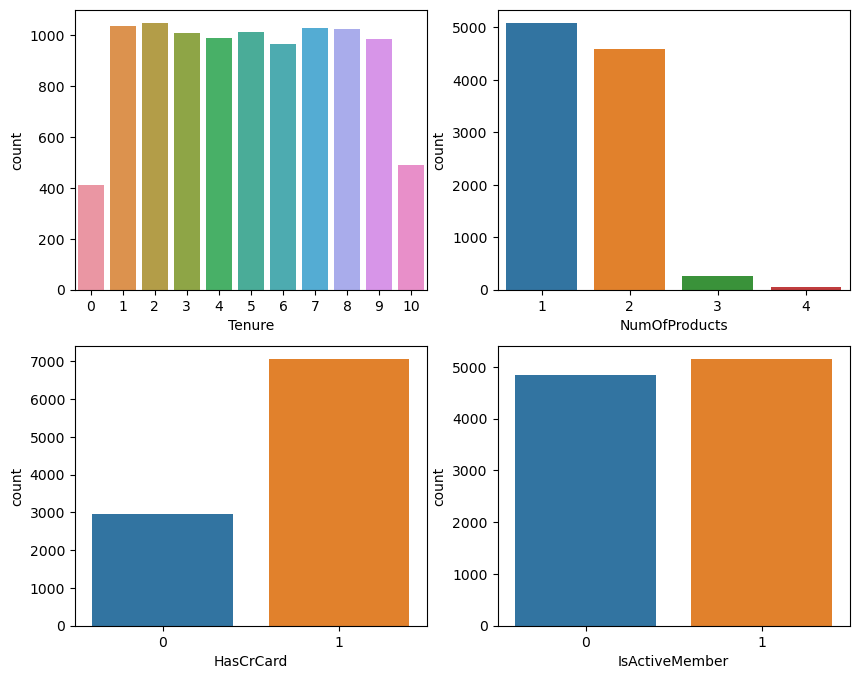

In [30]:
## Analyzing independent variables

plt.figure(figsize=(10,8))
plt.subplot(221)
sns.countplot(x='Tenure',data=df)
plt.subplot(222)
sns.countplot(x='NumOfProducts',data=df)
plt.subplot(223)
sns.countplot(x='HasCrCard',data=df)
plt.subplot(224)
sns.countplot(x='IsActiveMember',data=df)

plt.show();

## Let's see how many customers exited (target variable)

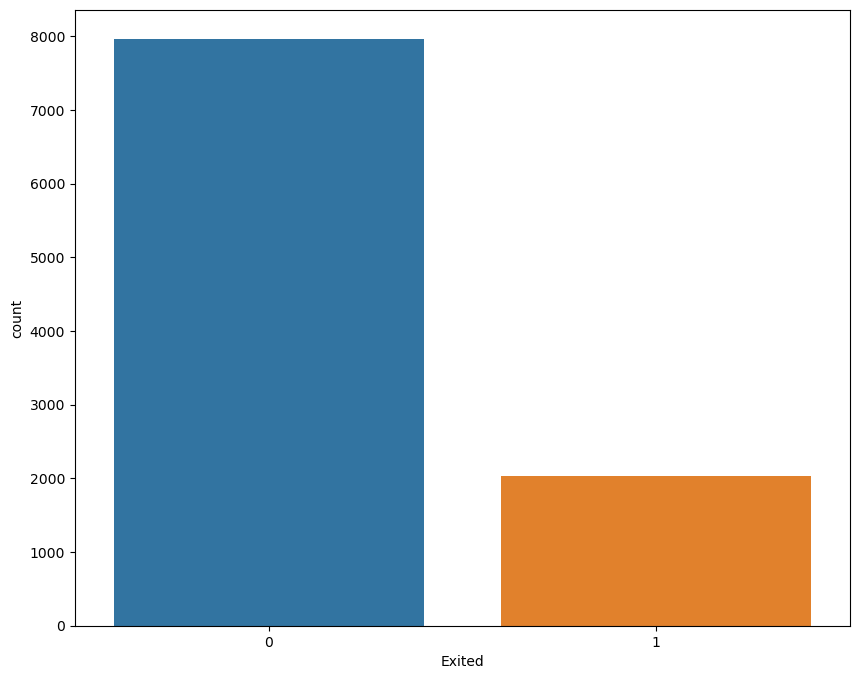

In [36]:
plt.figure(figsize=(10,8))
sns.countplot(x='Exited',data=df)
plt.show();

- Data is higly imbalance

### Bivariate Analysis

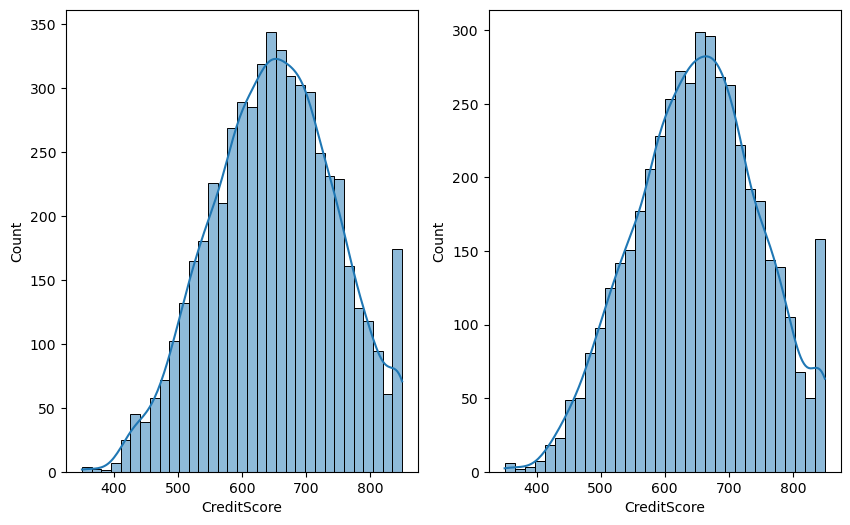

In [52]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.histplot(data=df[df.Gender=='Male'],x='CreditScore',kde=True)
plt.subplot(122)
sns.histplot(data=df[df.Gender=='Female'],x='CreditScore',kde=True)
# plt.tight_layout()
plt.show();